In [2]:
import math 
import tensorflow as tf
import matplotlib.pyplot as plt
print('Tensorflow version: \n'+ tf.__version__)

Tensorflow version: 
2.4.1


In [3]:
a = 1
b = 2
a+b

3

In [8]:
#### sinusoid function
def display_sinusoid():
    X = range(180)
    Y = [math.sin(x/10.0) for x in X]
    plt.plot(X,Y)

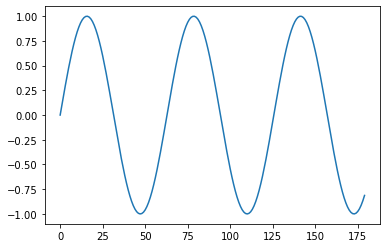

In [9]:
display_sinusoid()

In [10]:
####-------Accelerators-------####
# Detect hardware
try: 
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
# select appropiate distribution strategy for hardware
if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print('Running on TPU ', tpu.master())
elif len(gpus) > 0:
    strategy = tf.distribute.MirroredStrategy(gpus) # this works from 1 to multiple gpus
    print('Running on ', len(gpus), 'GPUs' )
else:
    strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    print('Running on GPU')
    

# How many accelerators do we have ? 
print('Number of Accelerators: ', strategy.num_replicas_in_sync)

Running on GPU
Number of Accelerators:  1


In [ ]:
# To use the señected distribution strategy: 
# Use:
# with strategy.scope:
#  #####------ define your keras model here -------#####
#
# For distributed computing, the batch size and learning rate need to be adjusted
# global batch size = BATCH_SIZE * strategy.replicas_in_sync # num replicas is 8 on a single TPU or N when running on N GPUs
# learning_rate = LEARNING_RATE * strategy.num_replicas_in_sync